# 第20章 神经网络

您可以在Jupyter Notebook查看器(nbviewer.jupyter.org)中查看此笔记本或在Google Colab(colab.research.google.com)中运行它。

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/machine-learning-with-python-cookbook/blob/master/20.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />在Jupyter Notebook查看器中查看</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/machine-learning-with-python-cookbook/blob/master/20.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />在Google Colab中执行</a>
  </td>
</table>

** 注意: 如果您想要使用不包含在TensorFlow的tf.keras API中的多后端Keras，那么请将from tensorflow.keras更改为from keras。

## 20.1 为神经网络预处理数据

In [56]:
# 加载库
from sklearn import preprocessing
import numpy as np

# 创建特征
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# 创建scaler
scaler = preprocessing.StandardScaler()

# 转换特征
features_standardized = scaler.fit_transform(features)

# 展示特征
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [57]:
# 打印均值和标准差
print("Mean:", round(features_standardized[:,0].mean()))
print("Standard deviation:", features_standardized[:,0].std())

Mean: 0.0
Standard deviation: 0.9999999999999999


## 20.2 设计一个神经网络

In [58]:
# 加载库
from tensorflow.keras import models
from tensorflow.keras import layers

# 启动神经网络
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16, activation="relu"))

# 添加使用sigmoid激活函数的全连接层
network.add(layers.Dense(units=1, activation="sigmoid"))

# 编译神经网络
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

### 打印出模型的概要信息

In [59]:
network.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_47 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 连接三个全连接层，从输入到输出
x = layers.Input(shape=(10,))
h1 = layers.Dense(units=16, activation="relu")(x)
h2 = layers.Dense(units=16, activation="relu")(h1)
y = layers.Dense(units=1, activation="sigmoid")(h2)

# 创建神经网络模型。
network = models.Model(x, y)

# 完成神经网络的模型配置
network.compile(loss="binary_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

In [61]:
network.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_49 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_50 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [62]:
dense = layers.Dense(units=16, activation="relu")
h1 = dense(x)

## 20.3 训练一个二元分类器

In [73]:
import os

# 当前文件的绝对路径
current_dir = os.getcwd()

# imdb.npz文件在当前目录下的路径
local_imdb_path = os.path.join(current_dir, 'imdb.npz')

# 从影评数据中加载数据和目标向量
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    path=local_imdb_path,
    num_words=number_of_features)

In [65]:
# 加载库
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 设定随机种子
np.random.seed(0)

# 设定想要的特征数量
number_of_features = 1000

# 将硬盘数据转化为one-hot编码过的特征向量
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 创建神经网络对象
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16, activation="relu", input_shape=(
    number_of_features,)))

# 再添加一个使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16, activation="relu"))

# 添加使用Sigmoid激活函数的全连接层
network.add(layers.Dense(units=1, activation="sigmoid"))

# 完成神经网络模型的设置
network.compile(loss="binary_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

# 训练神经网络
history = network.fit(features_train, # 特征
                      target_train, # 目标向量
                      epochs=3, # 迭代次数
                      verbose=1, # 打印迭代过程
                      batch_size=100, # 每个批次的样本数
                      validation_data=(features_test, target_test)) # 测试数据

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 36us/sample - loss: 0.4198 - accuracy: 0.8127 - val_loss: 0.3377 - val_accuracy: 0.8568
Epoch 2/3
25000/25000 [==============================] - 1s 29us/sample - loss: 0.3263 - accuracy: 0.8640 - val_loss: 0.3263 - val_accuracy: 0.8613
Epoch 3/3
25000/25000 [==============================] - 1s 30us/sample - loss: 0.3128 - accuracy: 0.8695 - val_loss: 0.3256 - val_accuracy: 0.8611


In [66]:
# 查看特征矩阵的形状
features_train.shape

(25000, 1000)

### 打印出模型的概要信息

In [10]:
# 完成神经网络模型的设置
network.compile(loss="binary_crossentropy", # 交叉熵
                optimizer="rmsprop") # 优化器

# 训练神经网络.
history = network.fit(features_train, # 特征
                      target_train, # 目标向量
                      epochs=3, # 迭代次数
                      verbose=1, # 打印迭代过程
                      batch_size=100, # 每个批次的样本数
                      validation_data=(features_test, target_test)) # 测试数据

Epoch 1/3
250/250 [==============================] - 2s 5ms/step - loss: 0.2987 - val_loss: 0.3241
Epoch 2/3
250/250 [==============================] - 1s 3ms/step - loss: 0.2852 - val_loss: 0.3293
Epoch 3/3
250/250 [==============================] - 1s 3ms/step - loss: 0.2736 - val_loss: 0.3516


In [47]:
network.evaluate(features_test, target_test)

25000/25000 [==============================] - 1s 21us/sample - loss: 0.3261 - accuracy: 0.8613


[0.3261475212478638, 0.86132]

## 20.4 训练一个多元分类器

In [67]:
# 加载库
import os
import numpy as np
from tensorflow.keras.datasets import reuters
# 如果您使用的是多后端Keras，请使用以下代码
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 设定随机种子
np.random.seed(0)

# 设定我们想要的特征数量
number_of_features = 5000

# 当前文件的绝对路径
current_dir = os.getcwd()

# reuters.npz文件在当前目录下的路径
local_reuters_path = os.path.join(current_dir, 'reuters.npz')

# 从路透社新闻数据中加载数据和目标向量
(data_train, target_vector_train), (data_test, target_vector_test) = reuters.load_data(
    path=local_reuters_path,
    num_words=number_of_features)

# 将特征数据转换为one-hot编码的特征矩阵。
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 将目标向量转换为one-hot编码的目标矩阵。
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# 创建神经网络模型。
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=100,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 再添加一个使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=100, activation="relu"))

# 添加使用Softmax激活函数的全连接层。
network.add(layers.Dense(units=46, activation="softmax"))

# 完成神经网络模型的设置。
network.compile(loss="categorical_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

In [68]:
# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标
                      epochs=3, # 3个时代
                      verbose=0, # 无输出
                      batch_size=100, # 每个批次的样本数
                      validation_data=(features_test, target_test)) # 测试数据

In [70]:
# 查看目标矩阵
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 20.5 训练一个回归模型

In [71]:
# 导入库。
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 设置随机种子。
np.random.seed(0)

# 创建特征矩阵和目标向量。
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# 将数据分为训练集和测试集。
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# 创建神经网络模型。
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=32,
                         activation="relu",
                         input_shape=(features_train.shape[1],)))

# 再添加一个使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=32, activation="relu"))

# 添加一个没有激活函数的全连接层。
network.add(layers.Dense(units=1))

# 完成神经网络模型的设置。
network.compile(loss="mse", # 均方误差
                optimizer="RMSprop", # 优化器
                metrics=["mse"]) # 性能指标

# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标向量
                      epochs=10, # 迭代次数
                      verbose=0, # 无输出
                      batch_size=100, # 每批样本数量
                      validation_data=(features_test, target_test)) # 测试数据

## 20.6 做出预测

### 清理内存
##### 如果你连续运行了多个内存密集型任务，请确保在运行新任务前清理不再使用的变量并手动调用垃圾收集。

In [88]:
import gc

# 删除变量
del data_train, target_train, data_test, target_test
gc.collect()

del features_train, features_test
gc.collect()

0

In [89]:
import os

# 当前文件的绝对路径
current_dir = os.getcwd()

# imdb.npz文件在当前目录下的路径
local_imdb_path = os.path.join(current_dir, 'imdb.npz')

# 从影评数据中加载数据和目标向量
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    path=local_imdb_path,
    num_words=number_of_features)

In [90]:
# 导入库。
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 设置随机种子。
np.random.seed(0)

# 指定所需的特征数量。
number_of_features = 10000

# 将IMDB数据转换为one-hot编码的特征矩阵。
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 创建神经网络模型。
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 再添加一个使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16, activation="relu"))

# 添加使用Sigmoid激活函数的全连接层。
network.add(layers.Dense(units=1, activation="sigmoid"))

# 完成神经网络模型的设置。
network.compile(loss="binary_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标向量
                      epochs=3, # 迭代次数
                      verbose=1, # 无输出
                      batch_size=100, # 每批样本数量
                      validation_data=(features_test, target_test)) # 测试数据

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 4s 149us/sample - loss: 0.3555 - accuracy: 0.8620 - val_loss: 0.2778 - val_accuracy: 0.8890
Epoch 2/3
25000/25000 [==============================] - 3s 129us/sample - loss: 0.2090 - accuracy: 0.9209 - val_loss: 0.2926 - val_accuracy: 0.8841
Epoch 3/3
25000/25000 [==============================] - 3s 129us/sample - loss: 0.1703 - accuracy: 0.9364 - val_loss: 0.3330 - val_accuracy: 0.8733


In [92]:
# 预测测试集的类别。
predicted_target = network.predict(features_test)

In [93]:
# 检查第一个样本被分类为类别1的概率。
predicted_target[0]

array([0.14596137], dtype=float32)

## 20.7 可视化训练历史

In [103]:
# 导入库。
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### 清理内存
##### 如果你连续运行了多个内存密集型任务，请确保在运行新任务前清理不再使用的变量并手动调用垃圾收集。

In [96]:
import gc

# 删除变量
del data_train, target_train, data_test, target_test
gc.collect()

del features_train, features_test
gc.collect()

0

In [97]:
import os

# 当前文件的绝对路径
current_dir = os.getcwd()

# imdb.npz文件在当前目录下的路径
local_imdb_path = os.path.join(current_dir, 'imdb.npz')

# 从影评数据中加载数据和目标向量
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    path=local_imdb_path,
    num_words=number_of_features)

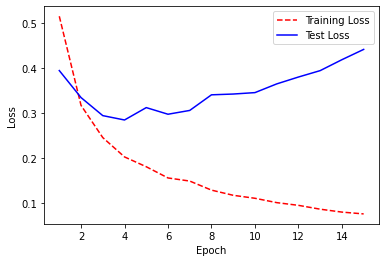

In [18]:
# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 10000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=15, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_loss) + 1)

# 손실 값의 기록을 시각화합니다.
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

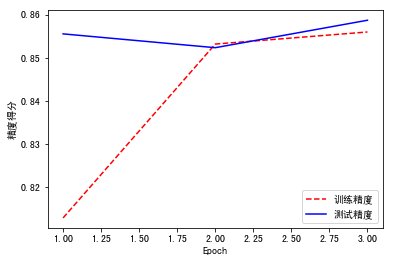

In [107]:
# 定义epoch_count变量
epoch_count = range(1, len(training_accuracy) + 1)

# 保存训练精度和测试精度记录。
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 绘制精度图。
plt.legend(["训练精度", "测试精度"])
plt.xlabel("Epoch")
plt.ylabel("精度得分")
plt.show();

## 20.8 가중치 규제로 과대적합 줄이기

In [105]:
# 导入库。
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# 设置随机种子。
np.random.seed(0)

# 指定所需的特征数量。
number_of_features = 1000

# 将电影评论数据转换为one-hot编码的特征矩阵。
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 创建神经网络模型。
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# 再添加一个使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))

# 添加使用Sigmoid激活函数的全连接层。
network.add(layers.Dense(units=1, activation="sigmoid"))

# 完成神经网络模型的设置。
network.compile(loss="binary_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标向量
                      epochs=3, # 迭代次数
                      verbose=1, # 无输出
                      batch_size=100, # 每批样本数量
                      validation_data=(features_test, target_test)) # 测试数据

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 37us/sample - loss: 0.6408 - accuracy: 0.8129 - val_loss: 0.4974 - val_accuracy: 0.8555
Epoch 2/3
25000/25000 [==============================] - 1s 31us/sample - loss: 0.4760 - accuracy: 0.8532 - val_loss: 0.4585 - val_accuracy: 0.8523
Epoch 3/3
25000/25000 [==============================] - 1s 30us/sample - loss: 0.4416 - accuracy: 0.8560 - val_loss: 0.4266 - val_accuracy: 0.8587


In [108]:
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer='l1_l2',
                         input_shape=(number_of_features,)))

## 20.9 通过提前终止减少过拟合

### 清理内存
##### 如果你连续运行了多个内存密集型任务，请确保在运行新任务前清理不再使用的变量并手动调用垃圾收集。

In [113]:
import gc

# 删除变量
del data_train, target_train, data_test, target_test
gc.collect()

del features_train, features_test
gc.collect()

0

In [114]:
import os

# 当前文件的绝对路径
current_dir = os.getcwd()

# imdb.npz文件在当前目录下的路径
local_imdb_path = os.path.join(current_dir, 'imdb.npz')

# 从影评数据中加载数据和目标向量
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    path=local_imdb_path,
    num_words=number_of_features)

In [115]:
# 导入库。
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 设置随机种子。
np.random.seed(0)

# 指定所需的特征数量。
number_of_features = 1000

# 将电影评论数据转换为one-hot编码的特征矩阵。
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 创建神经网络模型。
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 再添加一个使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16, activation="relu"))

# 添加使用Sigmoid激活函数的全连接层。
network.add(layers.Dense(units=1, activation="sigmoid"))

# 完成神经网络模型的设置。
network.compile(loss="binary_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

# 为了提前终止训练并保存最佳模型，设置回调函数。
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标向量
                      epochs=20, # 迭代次数
                      callbacks=callbacks, # 提前终止
                      verbose=1, # 无输出
                      batch_size=100, # 每批样本数量
                      validation_data=(features_test, target_test)) # 测试数据

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 39us/sample - loss: 0.4301 - accuracy: 0.8080 - val_loss: 0.3414 - val_accuracy: 0.8556
Epoch 2/20
25000/25000 [==============================] - 1s 30us/sample - loss: 0.3247 - accuracy: 0.8663 - val_loss: 0.3247 - val_accuracy: 0.8628
Epoch 3/20
25000/25000 [==============================] - 1s 29us/sample - loss: 0.3120 - accuracy: 0.8705 - val_loss: 0.3255 - val_accuracy: 0.8618
Epoch 4/20
25000/25000 [==============================] - 1s 29us/sample - loss: 0.3032 - accuracy: 0.8736 - val_loss: 0.3268 - val_accuracy: 0.8600


## 20.10 通过Dropout减少过拟合

In [116]:
# 라이브러리를 임포트합니다.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 입력층으로 드롭아웃 층을 추가합니다.
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=11, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
Epoch 2/3
Epoch 3/3


## 20.11 保存模型训练过程

In [119]:
# 导入库。
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# 设置随机种子。
np.random.seed(0)

# 指定所需的特征数量。
number_of_features = 1000

# 将电影评论数据转换为one-hot编码的特征矩阵。
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 创建神经网络模型。
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 再添加一个使用ReLU激活函数的全连接层。
network.add(layers.Dense(units=16, activation="relu"))

# 添加使用Sigmoid激活函数的全连接层。
network.add(layers.Dense(units=1, activation="sigmoid"))

# 完成神经网络模型的设置。
network.compile(loss="binary_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

# 为了提前终止训练并保存最佳模型，设置回调函数。
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标向量
                      epochs=3, # 迭代次数
                      callbacks=checkpoint, # 检查点
                      verbose=1, # 无输出
                      batch_size=100, # 每批样本数量
                      validation_data=(features_test, target_test)) # 测试数据

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 37us/sample - loss: 0.4460 - accuracy: 0.8035 - val_loss: 0.3425 - val_accuracy: 0.8561
Epoch 2/3
25000/25000 [==============================] - 1s 29us/sample - loss: 0.3257 - accuracy: 0.8635 - val_loss: 0.3247 - val_accuracy: 0.8625
Epoch 3/3
25000/25000 [==============================] - 1s 29us/sample - loss: 0.3113 - accuracy: 0.8709 - val_loss: 0.3284 - val_accuracy: 0.8613


## 20.12 使用k折交叉验证评估神经网络

In [121]:
# 导入库。
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# 设置随机种子。
np.random.seed(0)

# 特征数量
number_of_features = 100

# 创建特征矩阵和目标向量。
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# 创建返回已配置网络的函数。
def create_network():

    # 创建神经网络模型。
    network = models.Sequential()

    # 添加使用ReLU激活函数的全连接层。
    network.add(layers.Dense(units=16, activation="relu", input_shape=(
        number_of_features,)))

    # 再添加一个使用ReLU激活函数的全连接层。
    network.add(layers.Dense(units=16, activation="relu"))

    # 添加使用Sigmoid激活函数的全连接层。
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # 完成神经网络模型的配置。
    network.compile(loss="binary_crossentropy", # 二元交叉熵
                    optimizer="rmsprop", # 优化器
                    metrics=["accuracy"]) # 性能指标

    # 返回配置完成的模型。
    return network

# 将Keras模型包装起来使其能在scikit-learn中使用。
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=1)

# 使用3折交叉验证评估神经网络。
cross_val_score(neural_network, features, target, cv=3)

Train on 6666 samples
Epoch 1/10
6666/6666 [==============================] - 0s 39us/sample - loss: 0.8336 - accuracy: 0.5170
Epoch 2/10
6666/6666 [==============================] - 0s 13us/sample - loss: 0.6864 - accuracy: 0.5638
Epoch 3/10
6666/6666 [==============================] - 0s 12us/sample - loss: 0.6458 - accuracy: 0.6292
Epoch 4/10
6666/6666 [==============================] - 0s 12us/sample - loss: 0.6047 - accuracy: 0.6797
Epoch 5/10
6666/6666 [==============================] - 0s 12us/sample - loss: 0.5614 - accuracy: 0.7184
Epoch 6/10
6666/6666 [==============================] - 0s 13us/sample - loss: 0.5165 - accuracy: 0.7490
Epoch 7/10
6666/6666 [==============================] - 0s 12us/sample - loss: 0.4664 - accuracy: 0.7874
Epoch 8/10
6666/6666 [==============================] - 0s 12us/sample - loss: 0.4070 - accuracy: 0.8293
Epoch 9/10
6666/6666 [==============================] - 0s 12us/sample - loss: 0.3406 - accuracy: 0.8683
Epoch 10/10
3334/3334 [==========

array([0.88122374, 0.91419142, 0.90129012])

## 20.13 调校神经网络

In [122]:
# 导入库。
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# 设置随机种子。
np.random.seed(0)

# 特征数量
number_of_features = 100

# 创建特征矩阵和目标向量。
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# 创建返回已配置网络的函数。
def create_network(optimizer="rmsprop"):

    # 创建神经网络模型。
    network = models.Sequential()

    # 添加使用ReLU激活函数的全连接层。
    network.add(layers.Dense(units=16,
                             activation="relu",
                             input_shape=(number_of_features,)))

    # 再添加一个使用ReLU激活函数的全连接层。
    network.add(layers.Dense(units=16, activation="relu"))

    # 添加使用Sigmoid激活函数的全连接层。
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # 完成神经网络模型的配置。
    network.compile(loss="binary_crossentropy", # 二元交叉熵
                    optimizer=optimizer, # 优化器
                    metrics=["accuracy"]) # 性能指标

    # 返回配置完成的模型。
    return network

# 将Keras模型包装起来使其能在scikit-learn中使用。
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# 定义超参数搜索范围。
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# 创建超参数网格。
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# 创建网格搜索。
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# 执行网格搜索。
grid_result = grid.fit(features, target)

/Python3.7/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [123]:
# 检查最佳神经网络超参数。
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

## 20.14 可视化神经网络

In [164]:
from tensorflow.keras import models
from tensorflow.keras import layers

# 创建神经网络模型
network = models.Sequential()

# 添加使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 再添加一个使用ReLU激活函数的全连接层
network.add(layers.Dense(units=16, activation="relu"))

# 添加使用Sigmoid激活函数的全连接层
network.add(layers.Dense(units=1, activation="sigmoid"))

# 使用summary方法打印模型概览
network.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 16)                176       
_________________________________________________________________
dense_254 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_255 (Dense)            (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


## 20.15 图像分类

In [165]:
# 指定本地 mnist.npz 文件的路径。mnist.npz是一个打包了MNIST数据集的文件，包含训练集和测试集。
path = './mnist.npz'

# 使用 NumPy 的 load 函数直接加载 .npz 文件。
# allow_pickle=True 参数允许加载存储在npz文件中的对象数组，这是因为MNIST数据集的标签是以列表形式存储的。
with np.load(path, allow_pickle=True) as f:
    # 从文件中提取训练集的图像和标签。
    # f['x_train'] 获取训练集图像，这是一个形状为 (60000, 28, 28) 的数组，
    # 表示有60,000个样本，每个样本是28x28像素的图像。
    data_train, target_train = f['x_train'], f['y_train']
    
    # 从文件中提取测试集的图像和标签。
    # f['x_test'] 获取测试集图像，这是一个形状为 (10000, 28, 28) 的数组，
    # 表示有10,000个样本，每个样本是28x28像素的图像。
    data_test, target_test = f['x_test'], f['y_test']

# 使用NumPy的load函数直接加载.npz文件
with np.load(path, allow_pickle=True) as data:
    # 打印所有包含的数组的键名
    print("npz文件中的键名:", data.files)
    
    # 遍历所有键名，并打印每个数组的形状
    for key in data.files:
        print(f"键 '{key}' 对应的数组形状:", data[key].shape)

npz文件中的键名: ['x_test', 'x_train', 'y_train', 'y_test']
键 'x_test' 对应的数组形状: (10000, 28, 28)
键 'x_train' 对应的数组形状: (60000, 28, 28)
键 'y_train' 对应的数组形状: (60000,)
键 'y_test' 对应的数组形状: (10000,)


In [168]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
# 如果使用多后端Keras，请使用以下代码
# from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# 如果使用多后端Keras，请使用以下代码
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

# 将颜色通道设置为首个维度。
K.set_image_data_format("channels_last")

# 设置随机种子。
np.random.seed(0)

# 设置图像信息。
channels = 1
height = 28
width = 28

# 将训练图像数据调整为特征的尺寸。
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# 将测试图像数据调整为特征的尺寸。
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# 将像素强度的范围缩放到0到1之间。
features_train = data_train / 255
features_test = data_test / 255

# 由于改变了数据格式，我们需要重新调整特征的形状
# 从原来的(data_train.shape[0], channels, height, width)调整为(data_train.shape[0], height, width, channels)
features_train = features_train.reshape(features_train.shape[0], height, width, channels)
features_test = features_test.reshape(features_test.shape[0], height, width, channels)

# 确保模型的输入层匹配新的数据格式
network = Sequential()

# 修改输入层的input_shape参数以匹配NHWC格式
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(height, width, channels),
                   activation='relu'))

# 添加使用2x2窗口的最大池化层。
network.add(MaxPooling2D(pool_size=(2, 2)))

# 添加一个dropout层。
network.add(Dropout(0.5))

# 添加一个展平层以将输入展开为一维向量。
network.add(Flatten())

# 添加一个128个单元、使用ReLU激活函数的全连接层。
network.add(Dense(128, activation="relu"))

# 添加一个dropout层。
network.add(Dropout(0.5))

# 添加一个使用softmax激活函数的全连接层。
network.add(Dense(number_of_classes, activation="softmax"))

# 完成神经网络模型的配置。
network.compile(loss="categorical_crossentropy", # 交叉熵
                optimizer="rmsprop", # 优化器
                metrics=["accuracy"]) # 性能指标

# 训练神经网络。
network.fit(features_train, # 特征
            target_train, # 目标
            epochs=5, # 训练轮数
            verbose=1, # 显示输出
            batch_size=1000, # 批量大小
            validation_data=(features_test, target_test)) # 验证数据

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 635us/sample - loss: 0.6133 - accuracy: 0.8098 - val_loss: 0.1737 - val_accuracy: 0.9506
Epoch 2/5
60000/60000 [==============================] - 38s 633us/sample - loss: 0.2007 - accuracy: 0.9411 - val_loss: 0.0897 - val_accuracy: 0.9712
Epoch 3/5
60000/60000 [==============================] - 38s 630us/sample - loss: 0.1289 - accuracy: 0.9622 - val_loss: 0.0653 - val_accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 38s 626us/sample - loss: 0.1010 - accuracy: 0.9697 - val_loss: 0.0503 - val_accuracy: 0.9842
Epoch 5/5
60000/60000 [==============================] - 38s 634us/sample - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.0446 - val_accuracy: 0.9852


In [146]:
network.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_247 (Dense)            (None, 128)               1179776   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_248 (Dense)            (None, 10)              

In [169]:
# 测试集上的评估
test_loss, test_accuracy = network.evaluate(features_test, target_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

10000/10000 [==============================] - 2s 156us/sample - loss: 0.0446 - accuracy: 0.9852
Test Loss: 0.04462142323297449
Test Accuracy: 0.9851999878883362


In [ ]:
import matplotlib.pyplot as plt

# 训练神经网络并保存训练过程中的信息
history = network.fit(features_train, target_train, epochs=5, verbose=1, batch_size=1000, validation_data=(features_test, target_test))

# 绘制训练过程中的损失
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制训练过程中的准确率
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 630us/sample - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.0411 - val_accuracy: 0.9857
Epoch 2/5
60000/60000 [==============================] - 38s 627us/sample - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 3/5
60000/60000 [==============================] - 38s 627us/sample - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 4/5
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0360 - val_accuracy: 0.9883
Epoch 5/5
55000/60000 [==========================>...] - ETA: 2s - loss: 0.0522 - accuracy: 0.9843

## 20.16 通过图像增强来改善卷积神经网络的性能

In [2]:
# 如果在 Google Colab 上运行，请删除以下注释并执行。
import zipfile

# 指定要解压缩的文件名
file_name = 'raw.zip'

# 解压缩文件
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall('.')

In [4]:
# 导入库。
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 创建图像增强对象。
augmentation = ImageDataGenerator(featurewise_center=True, # 应用 ZCA 白化。
                                  zoom_range=0.3, # 随机缩放图像。
                                  width_shift_range=0.2, # 随机移动图像。
                                  horizontal_flip=True, # 随机水平翻转图像。
                                  rotation_range=90) # 随机旋转图像。

# 将增强应用于“raw/images”目录中的所有图像。
augment_images = augmentation.flow_from_directory("raw/images", # 图像文件夹
                                                  batch_size=32, # 批处理大小
                                                  class_mode="binary", # 类别模式
                                                  save_to_dir="processed/images") # 将增强后的图像保存到指定目录。

Found 12665 images belonging to 2 classes.


```python
# 训练神经网络模型。
network.fit_generator(augment_images,
                      # 每个epoch调用生成器的次数。
                      steps_per_epoch=2000,
                      # epoch数量。
                      epochs=5,
                      # 验证数据生成器。
                      validation_data=augment_images_test,
                      # 在每个验证epoch期间调用生成器的次数。
                      validation_steps=800)
```

## 20.17 文本分类

In [6]:
# 恢复在20.15节中设置的颜色通道位置。
# 书中没有此代码。
from tensorflow.keras import backend as K

K.set_image_data_format("channels_last")

In [7]:
# 导入库。
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import models
from tensorflow.keras import layers

# 设置随机种子。
np.random.seed(0)

# 指定所需特征的数量。
number_of_features = 1000

### 从电影评论数据加载训练数据和目标向量。
import os

# 当前文件的绝对路径
current_dir = os.getcwd()

# imdb.npz文件在当前目录下的路径
local_imdb_path = os.path.join(current_dir, 'imdb.npz')

# 从影评数据中加载数据和目标向量
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    path=local_imdb_path,
    num_words=number_of_features)

###

# 对每个样本进行填充或截断，使其具有400个特征。
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

# 创建神经网络模型。
network = models.Sequential()

# 添加嵌入层。
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# 添加具有128个单元的LSTM层。
network.add(layers.LSTM(units=128))

# 添加具有sigmoid激活函数的全连接层。
network.add(layers.Dense(units=1, activation="sigmoid"))

# 完成神经网络模型的配置。
network.compile(loss="binary_crossentropy", # 二元交叉熵
                optimizer="Adam", # 优化器
                metrics=["accuracy"]) # 性能指标

In [8]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         128000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 259,713
Trainable params: 259,713
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标
                      epochs=3, # 训练轮数
                      verbose=1, # 不显示输出
                      batch_size=1000, # 批量大小
                      validation_data=(features_test, target_test)) # 测试数据

W0326 22:16:29.641951 140174145750848 deprecation.py:323] From /Python3.7/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


KeyboardInterrupt: 

In [159]:
# 查看第一个样本
print(data_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [160]:
# 查看第一个样本
print(features_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

### 附录

In [162]:
# 创建神经网络模型。
network = models.Sequential()

# 添加嵌入层。
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# 添加包含128个单元的GRU层。
network.add(layers.GRU(units=128))

# 添加使用sigmoid激活函数的全连接层。
network.add(layers.Dense(units=1, activation="sigmoid"))

# 完成神经网络模型的配置。
network.compile(loss="binary_crossentropy", # 二元交叉熵
                optimizer="Adam", # Adam优化器
                metrics=["accuracy"]) # 准确率指标

# 训练神经网络。
history = network.fit(features_train, # 特征
                      target_train, # 目标
                      epochs=3, # 训练轮数
                      verbose=0, # 不显示输出
                      batch_size=1000, # 批量大小
                      validation_data=(features_test, target_test)) # 测试数据

ResourceExhaustedError:  OOM when allocating tensor with shape[1000,400,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node embedding_3/embedding_lookup (defined at <ipython-input-162-d1dd546c27f1>:24) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_1835327]

Function call stack:
keras_scratch_graph
